In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("data_640_validated.csv")

In [3]:
df.head(5)

,Index,Date,A1_1,A1_2,A2,A3,A4,A5,A6,A7,...,F23,F24,F25,F26,F27,F28,F29,F30,F31,F32
0,598,5/29/2020 8:11,Filipino,Asia,Male,Secondary school,A pet,11,Asian,"Single, never married",...,1,2,5,4,5,4,1,5,1,1
1,230,5/23/2020 1:54,American,US/Canada,Male,Secondary school,Both,13,White,"Single, never married",...,1,1,4,2,5,4,2,4,1,4
2,232,5/23/2020 2:01,American,US/Canada,Male,Secondary school,Both,13,White,"Single, never married",...,1,1,4,1,5,3,2,5,2,4
3,308,5/25/2020 1:34,Filipino,Asia,Female,High school,A pet,13,Asian,"Single, never married",...,3,2,3,4,5,5,2,5,1,2
4,231,5/23/2020 2:00,Mexican American,US/Canada,Male,Secondary school,A pet,14,Hispanic or Latino,"Single, never married",...,5,4,4,3,4,4,1,5,5,5


In [4]:
#Renaming the columns for better understanding 
df=df.rename(columns={"A1_1":"Nationality", "A1_2":"Region","A2":"Gender","A3":"Highest Edu","A4":"P or G","A5":"Age",
                   "A6":"Ethenicity","A7":"Marital Stat","A8":"Employment Stat"})

## Data Quality Issues 

In [5]:
#sorting the values to get a basic idea 
df=df.sort_values(by="Index")


In [6]:
#Unique values in Nationality - to see 
a=df['Nationality'].unique()
a.sort()
a

array([' America', ' American', ' United States', '29',
       'African American', 'America', 'American', 'American ',
       'American (U.S.A.)', 'American (US)', 'American (USA)',
       'American (USA) ', 'American (United States of America) ',
       'American (United States)', 'Anerican', 'Argentina',
       'Ashenkazi Jewish', 'Asian', 'Australian', 'Autsralian', 'British',
       'British ', 'British - White ',
       'British / Filipino, I am a dual citizen ', 'British/English ',
       'Canadian', 'Canadian ', 'Candadian', 'Catalan (spanish)',
       'Caucasian ', 'China', 'Chinese', 'Citizen of the United States',
       'Colombian', 'Cornish', 'Dutch', 'English ',
       'English, Irish, German', 'FILIPINO', 'Filipino', 'Filipino ',
       'Filipino American', 'Filipino American ', 'Filipino-American',
       'French', 'Friendly', 'German', 'German, Native American ',
       'Hispanic ', 'Hong Kong', 'Icelandic', 'Indonesia ', 'Irish',
       'Italian', 'Japanese', 'Korean/ 

#### If we see this we can say that Filipino has been repeated twice with 2 different set of numbers, so its one of the quality issues. Certain people have also mentioned numbers, white etc - which indicate quality issues. 

In [7]:
#Unique values in Region - to see 
df['Region'].unique()

array(['US/Canada', 'Asia', 'Other', 'EU'], dtype=object)

In [8]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [9]:
#Unique Values in Education 
df['Highest Edu'].unique()

array(['Undergraduate school', 'High school',
       'Graduate school and higher', 'Secondary school', 'Primary school'],
      dtype=object)

In [10]:
df['P or G'].unique()

array(['None', 'A garden', 'A pet', 'Both'], dtype=object)

#### Indicating that only unique values exist, no quality issues. 

In [11]:
df['Age'].unique()

array(['22', '23', '31', '21', '27', '26', '20', '17', '37', '16', '18',
       '25', '28', '19', '30', '35', '32', '24', '33', '29', '41', '34',
       '15', '36', '38', '13', '14', '46', '45', '42', '43', '48', '40',
       '49', '55', '39', '30s', '11', 'sub 28'], dtype=object)

#### In this age column if you see someone has mentioned 30s instead of the exact age and sub 28 as well, data quality issue.

In [12]:
df['Ethenicity'].unique()

array(['Asian', 'Other', 'White', 'Hispanic or Latino',
       'Black or African American', 'Native American or American Indian',
       'Pacific Islander'], dtype=object)

In [13]:
df['Marital Stat'].unique()

array(['Single, never married', 'Married or domestic partnership',
       'Divorced', 'Widowed', 'Separated'], dtype=object)

In [14]:
df['Employment Stat'].unique()

array(['Employed for wages', 'A student',
       'Out of work and looking for work', 'Self-employed',
       'Out of work but not currently looking for work', 'A homemaker',
       'Unable to work', 'Military', 'Retired'], dtype=object)

#### When looking into COVID concern Data (B1-B3) and Environment Perception data (C1-C15), we see that all of them contain unique values, no quality issues. 

In [15]:
df['D1'].unique()

array(['More than 3 years', '1-2 years', '2-3 years', '0-1 years', nan],
      dtype=object)

#### There are NAN Values present - which will have to be changed to 0 to continue with the data analysis. 

In [16]:
df['D2'].unique()

array(['Adventure, RPG, Simulation, Strategy',
       'Adventure, Simulation, Strategy, puzzle, trivia',
       'Adventure, RPG, Strategy',
       'Action, Adventure, RPG, Simulation, Strategy',
       'RPG, Simulation, Strategy, FPS',
       'Action, RPG, Simulation, Sports',
       'Action, Adventure, RPG, Strategy',
       'Action, RPG, Simulation, Strategy', 'RPG, Simulation',
       'Action, RPG, Simulation', 'Action, Adventure, RPG, Simulation',
       'Action, RPG, 2D Fighter', 'Action, Adventure',
       'Action, Adventure, RPG, MOBA', 'RPG, Strategy',
       'RPG, Simulation, Strategy',
       'Action, Adventure, Simulation, Strategy',
       'Action, Adventure, RPG',
       'Action, Adventure, RPG, Strategy, Sports',
       'Action, Adventure, RPG, Simulation, Strategy, Farming / Chill',
       'Action, Adventure, Sports',
       'Action, Adventure, Simulation, Strategy, puzzle', 'Sports',
       'Action', 'Simulation', 'Action, Adventure, RPG, Sports', 'RPG',
       'Action,

#### We can analyse this to understand better about the players gaming backgrounds - almost everything is unique

In [17]:
df['D3'].unique()

array(['Every week', 'Almost everyday', 'Everyday', 'Almost every week',
       'Less than every month', 'Every month', nan], dtype=object)

#### Nan is present, which will have to be removed for further analysis.

In [18]:
df['D4'].unique()

array(['1-2 hours', '3-4 hours', '2-3 hours', '6-9 hours', '45',
       'Very much , about 6-7 hours per day', 'More than 5', '7 hrs',
       'More than 3-4 Hours', 'More than 10', '20', '5-6 hours', 'Over 4',
       '5-7 hours', '40', '6 to 7 hours', '6', '8',
       '6-7, hours, possibly more on occasion',
       'Somewhere in the 30 hour range ', '6-7 hours, more on occasion',
       '7-8 hours', '50+', '5-8 hours', '10-Jul', '30', '6 hours a day ',
       'Over 7', '50+ hours ', 'Can be 5+ depending on work',
       '3 - 4 hours every day', 'More than 4 hours ', '10+',
       '12+  (I don’t keep count)', 'Way above 20hrs', '6-May',
       '2-3 weekdays, 5-7 on weekends. ', '8-Jul', '6-7 hours', '14',
       '8 hours', '8 Hours hehe', 'Around 6-8hrs', 'More than 6 hours',
       '6 hours', '10-12 hours', '5', '4-5 hours', '20+',
       'More than 5 hours', 'At least 10 hours in the last two weeks',
       '6-8 hours', '9', '10-15 hours', 'Over 4 hours',
       'I’ve spent a lot more

#### Got to extract the exact numbers, to understand better, also for a sample date is put, and above 24 hours as well - will have to check - examples of quality issues. 

### The remaining Game-playing habit, In game behaviour data and Game Playing Habits seems to be unique based on the questions, and completely unique - no nan values.

# Looking into the file aspects 

In [19]:
len(df)#number of rows in the dataset 

640

In [20]:
df.columns

Index(['Index', 'Date', 'Nationality', 'Region', 'Gender', 'Highest Edu',
       'P or G', 'Age', 'Ethenicity', 'Marital Stat', 'Employment Stat', 'B1',
       'B2', 'B3', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10',
       'C11', 'C12', 'C13', 'C14', 'C15', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6',
       'D7', 'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10',
       'E11', 'E12', 'E13', 'E14', 'E15', 'E16', 'E17', 'E18', 'E19', 'E20',
       'E21', 'E22', 'E23', 'E24', 'E25', 'E26', 'E27', 'E28', 'F1', 'F2',
       'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'F13',
       'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20', 'F21', 'F22', 'F23',
       'F24', 'F25', 'F26', 'F27', 'F28', 'F29', 'F30', 'F31', 'F32'],
      dtype='object')

In [21]:
df.head(1)

,Index,Date,Nationality,Region,Gender,Highest Edu,P or G,Age,Ethenicity,Marital Stat,...,F23,F24,F25,F26,F27,F28,F29,F30,F31,F32
128,1,5/15/2020 14:20,USA,US/Canada,Male,Undergraduate school,None,22,Asian,"Single, never married",...,2,2,2,2,2,2,2,2,2,2


### Checking the datatype of all the columns

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 640 entries, 128 to 639
Data columns (total 96 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Index            640 non-null    int64 
 1   Date             640 non-null    object
 2   Nationality      640 non-null    object
 3   Region           640 non-null    object
 4   Gender           640 non-null    object
 5   Highest Edu      640 non-null    object
 6   P or G           640 non-null    object
 7   Age              640 non-null    object
 8   Ethenicity       640 non-null    object
 9   Marital Stat     640 non-null    object
 10  Employment Stat  640 non-null    object
 11  B1               640 non-null    object
 12  B2               640 non-null    object
 13  B3               640 non-null    object
 14  C1               640 non-null    int64 
 15  C2               640 non-null    int64 
 16  C3               640 non-null    int64 
 17  C4               640 non-null    

#### Will have to change the datatype for the first 8 columns - date time is object have to make it date time type etc. 

### Age distribution 

In [23]:
age_df=df.copy()

In [24]:
age_df

,Index,Date,Nationality,Region,Gender,Highest Edu,P or G,Age,Ethenicity,Marital Stat,...,F23,F24,F25,F26,F27,F28,F29,F30,F31,F32
128,1,5/15/2020 14:20,USA,US/Canada,Male,Undergraduate school,None,22,Asian,"Single, never married",...,2,2,2,2,2,2,2,2,2,2
164,2,5/15/2020 18:37,Vietnam,Asia,Female,Undergraduate school,A garden,23,Asian,"Single, never married",...,3,2,3,3,4,3,2,3,2,2
165,3,5/16/2020 0:21,Vietnam,Asia,Female,High school,A garden,23,Asian,"Single, never married",...,2,1,3,3,4,4,1,4,2,2
527,4,5/16/2020 0:25,Vietnam,Asia,Female,Graduate school and higher,A pet,31,Asian,"Single, never married",...,2,1,2,2,2,2,1,2,1,1
86,5,5/16/2020 0:26,Vietnam,Asia,Male,Graduate school and higher,A pet,21,Asian,"Single, never married",...,1,1,2,1,2,1,1,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,636,6/8/2020 9:22,usa,US/Canada,Male,Undergraduate school,Both,28,White,Married or domestic partnership,...,4,5,5,4,3,4,4,5,4,4
406,637,6/8/2020 16:29,usa,US/Canada,Male,Graduate school and higher,Both,27,Black or African American,"Single, never married",...,3,4,5,5,5,4,3,4,5,5
526,638,6/8/2020 21:42,uk,EU,Male,Undergraduate school,Both,30,Black or African American,Married or domestic partnership,...,3,4,4,3,4,3,4,5,4,4
541,639,6/9/2020 0:36,uk,EU,Male,Graduate school and higher,Both,31,White,Married or domestic partnership,...,5,4,4,4,3,2,3,4,5,4


In [25]:
df

,Index,Date,Nationality,Region,Gender,Highest Edu,P or G,Age,Ethenicity,Marital Stat,...,F23,F24,F25,F26,F27,F28,F29,F30,F31,F32
128,1,5/15/2020 14:20,USA,US/Canada,Male,Undergraduate school,None,22,Asian,"Single, never married",...,2,2,2,2,2,2,2,2,2,2
164,2,5/15/2020 18:37,Vietnam,Asia,Female,Undergraduate school,A garden,23,Asian,"Single, never married",...,3,2,3,3,4,3,2,3,2,2
165,3,5/16/2020 0:21,Vietnam,Asia,Female,High school,A garden,23,Asian,"Single, never married",...,2,1,3,3,4,4,1,4,2,2
527,4,5/16/2020 0:25,Vietnam,Asia,Female,Graduate school and higher,A pet,31,Asian,"Single, never married",...,2,1,2,2,2,2,1,2,1,1
86,5,5/16/2020 0:26,Vietnam,Asia,Male,Graduate school and higher,A pet,21,Asian,"Single, never married",...,1,1,2,1,2,1,1,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,636,6/8/2020 9:22,usa,US/Canada,Male,Undergraduate school,Both,28,White,Married or domestic partnership,...,4,5,5,4,3,4,4,5,4,4
406,637,6/8/2020 16:29,usa,US/Canada,Male,Graduate school and higher,Both,27,Black or African American,"Single, never married",...,3,4,5,5,5,4,3,4,5,5
526,638,6/8/2020 21:42,uk,EU,Male,Undergraduate school,Both,30,Black or African American,Married or domestic partnership,...,3,4,4,3,4,3,4,5,4,4
541,639,6/9/2020 0:36,uk,EU,Male,Graduate school and higher,Both,31,White,Married or domestic partnership,...,5,4,4,4,3,2,3,4,5,4


In [26]:
age_df.drop(age_df[age_df["Age"]=="30s"].index, inplace = True)

In [27]:
age_df.drop(age_df[age_df["Age"]=="sub 28"].index, inplace = True)

In [28]:
age_df

,Index,Date,Nationality,Region,Gender,Highest Edu,P or G,Age,Ethenicity,Marital Stat,...,F23,F24,F25,F26,F27,F28,F29,F30,F31,F32
128,1,5/15/2020 14:20,USA,US/Canada,Male,Undergraduate school,None,22,Asian,"Single, never married",...,2,2,2,2,2,2,2,2,2,2
164,2,5/15/2020 18:37,Vietnam,Asia,Female,Undergraduate school,A garden,23,Asian,"Single, never married",...,3,2,3,3,4,3,2,3,2,2
165,3,5/16/2020 0:21,Vietnam,Asia,Female,High school,A garden,23,Asian,"Single, never married",...,2,1,3,3,4,4,1,4,2,2
527,4,5/16/2020 0:25,Vietnam,Asia,Female,Graduate school and higher,A pet,31,Asian,"Single, never married",...,2,1,2,2,2,2,1,2,1,1
86,5,5/16/2020 0:26,Vietnam,Asia,Male,Graduate school and higher,A pet,21,Asian,"Single, never married",...,1,1,2,1,2,1,1,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,635,6/7/2020 22:11,usa,US/Canada,Male,Undergraduate school,Both,27,Hispanic or Latino,"Single, never married",...,4,3,4,4,5,5,4,4,5,4
448,636,6/8/2020 9:22,usa,US/Canada,Male,Undergraduate school,Both,28,White,Married or domestic partnership,...,4,5,5,4,3,4,4,5,4,4
406,637,6/8/2020 16:29,usa,US/Canada,Male,Graduate school and higher,Both,27,Black or African American,"Single, never married",...,3,4,5,5,5,4,3,4,5,5
526,638,6/8/2020 21:42,uk,EU,Male,Undergraduate school,Both,30,Black or African American,Married or domestic partnership,...,3,4,4,3,4,3,4,5,4,4


In [29]:
df

,Index,Date,Nationality,Region,Gender,Highest Edu,P or G,Age,Ethenicity,Marital Stat,...,F23,F24,F25,F26,F27,F28,F29,F30,F31,F32
128,1,5/15/2020 14:20,USA,US/Canada,Male,Undergraduate school,None,22,Asian,"Single, never married",...,2,2,2,2,2,2,2,2,2,2
164,2,5/15/2020 18:37,Vietnam,Asia,Female,Undergraduate school,A garden,23,Asian,"Single, never married",...,3,2,3,3,4,3,2,3,2,2
165,3,5/16/2020 0:21,Vietnam,Asia,Female,High school,A garden,23,Asian,"Single, never married",...,2,1,3,3,4,4,1,4,2,2
527,4,5/16/2020 0:25,Vietnam,Asia,Female,Graduate school and higher,A pet,31,Asian,"Single, never married",...,2,1,2,2,2,2,1,2,1,1
86,5,5/16/2020 0:26,Vietnam,Asia,Male,Graduate school and higher,A pet,21,Asian,"Single, never married",...,1,1,2,1,2,1,1,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,636,6/8/2020 9:22,usa,US/Canada,Male,Undergraduate school,Both,28,White,Married or domestic partnership,...,4,5,5,4,3,4,4,5,4,4
406,637,6/8/2020 16:29,usa,US/Canada,Male,Graduate school and higher,Both,27,Black or African American,"Single, never married",...,3,4,5,5,5,4,3,4,5,5
526,638,6/8/2020 21:42,uk,EU,Male,Undergraduate school,Both,30,Black or African American,Married or domestic partnership,...,3,4,4,3,4,3,4,5,4,4
541,639,6/9/2020 0:36,uk,EU,Male,Graduate school and higher,Both,31,White,Married or domestic partnership,...,5,4,4,4,3,2,3,4,5,4


In [30]:
a=age_df["Age"].value_counts()
type(a)
df_age=pd.DataFrame({'Age':a.index, 'Count':a.values})
max(df_age['Age'])
df_age = df_age.apply(pd.to_numeric)

In [31]:
count_11_to_20=0
count_21_to_30=0
count_31_to_40=0
count_41_to_50=0
count_51_to_60=0
for i in range(0,len(df_age['Age'])):
    if df_age['Age'][i]>=11 and df_age['Age'][i]<=20:
        count_11_to_20+=df_age['Count'][i]
    elif df_age['Age'][i]>=21 and df_age['Age'][i]<=30:
        count_21_to_30+=df_age['Count'][i]
    elif df_age['Age'][i]>=31 and df_age['Age'][i]<=40:
        count_31_to_40+=df_age['Count'][i]
    elif df_age['Age'][i]>=41 and df_age['Age'][i]<=50:
        count_41_to_50+=df_age['Count'][i]
    elif df_age['Age'][i]>=51 and df_age['Age'][i]<=60:
        count_51_to_60+=df_age['Count'][i]
#as a person was in his 30s - adding one more to count 31 to 40 
count_31_to_40+=1
# as a person was sub 28 - adding one more to the count 21 to 30 
count_21_to_30+=1
x=["11 to 20","21 to 30","31 to 40","41 to 50","51 to 60"]
y=[count_11_to_20, count_21_to_30, count_31_to_40, count_41_to_50, count_51_to_60]


In [32]:
import matplotlib.pyplot as plt
import numpy as np

In [33]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

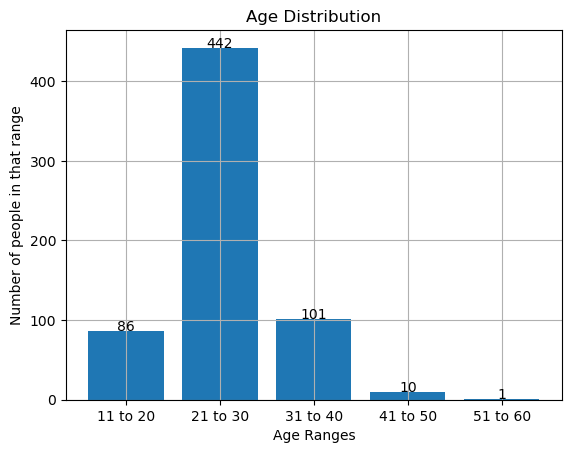

In [34]:
plt.bar(x,y)
addlabels(x, y)
plt.title("Age Distribution")
plt.xlabel("Age Ranges")
plt.ylabel("Number of people in that range")
plt.grid()
plt.show()

## Gender and In game behaviour - Cutting down trees 

In [35]:
group_data = df.groupby(['Gender','E17'])['Index'].count()
group_data=group_data.to_frame()
group_data.rename(columns={"Index":"Count"})

Count
Gender E17       
Female 1       30
       2      161
       3      143
       4       78
Male   1        9
       2       80
       3       94
       4       45

## Relationship between the biological sex as defined by the dataset and the players environmental perception 

In [36]:
group_data1 = df.groupby(['Gender','C1'])['Index'].count()
group_data1=group_data1.to_frame()
group_data1.rename(columns={"Index":"Count"})

Count
Gender C1       
Female 1       7
       2      33
       3     106
       4     160
       5     106
Male   1       5
       2      12
       3      54
       4     115
       5      42

#### C1 - We are approaching the limit of the number of people the earth can support 
* Almost 106 + 160 females agree with this and 40 disagree with this 
* 115+42 males agree with this and 17 disagree to this. 

In [37]:
group_data1 = df.groupby(['Gender','C2'])['Index'].count()
group_data1=group_data1.to_frame()
group_data1.rename(columns={"Index":"Count"})

Count
Gender C2       
Female 1      22
       2      71
       3     143
       4     145
       5      31
Male   1      37
       2      84
       3      60
       4      36
       5      11

#### C2 - Humans have to right to modify the natural environment to suit their needs - Reverse Scale 
* 93 females agree to this, 145+31 disagree to this 
* 111 males agree to this and 47 disagree to this. 

In [38]:
group_data1 = df.groupby(['Gender','C3'])['Index'].count()
group_data1=group_data1.to_frame()
group_data1.rename(columns={"Index":"Count"})

Count
Gender C3       
Female 1       3
       2      17
       3      38
       4     198
       5     156
Male   1       4
       2      12
       3      46
       4      95
       5      71

#### C3 - When humans interfere with nature it often produces disastrous consequences 
* 198+156 females agree to this, only 20 disagree to this 
* 95+71 males agree to this, only 16 disagree to this 

In [39]:
group_data1 = df.groupby(['Gender','C4'])['Index'].count()
group_data1=group_data1.to_frame()
group_data1.rename(columns={"Index":"Count"})

Count
Gender C4       
Female 1      41
       2     107
       3     162
       4      72
       5      30
Male   1      43
       2      82
       3      76
       4      21
       5       6

#### C4 - Human ingenuity will insure that we do not make the Earth unlivable - Reverse Scale
* Majority of them are in the we dont agree or disagree to this in females
* Similarly in the case of males

In [40]:
group_data1 = df.groupby(['Gender','C5'])['Index'].count()
group_data1=group_data1.to_frame()
group_data1.rename(columns={"Index":"Count"})

Count
Gender C5       
Female 1       2
       2      12
       3      24
       4     134
       5     240
Male   1       4
       2      12
       3      32
       4      84
       5      96

#### C5 - Humans are seriously abusing the environment
* Majority agree in both male and females

In [41]:
group_data1 = df.groupby(['Gender','C6'])['Index'].count()
group_data1=group_data1.to_frame()
group_data1.rename(columns={"Index":"Count"})

Count
Gender C6       
Female 1     133
       2     143
       3      78
       4      44
       5      14
Male   1      65
       2     100
       3      44
       4      12
       5       7

#### C6 - The Earth has plenty of natural resources if we just learn how to develop them. - Reverse Scale 
* Majority agree in both. 

In [42]:
group_data1 = df.groupby(['Gender','C7'])['Index'].count()
group_data1=group_data1.to_frame()
group_data1.rename(columns={"Index":"Count"})

Count
Gender C7       
Female 1       1
       2      16
       3      30
       4     109
       5     256
Male   1       4
       2      12
       3      36
       4      97
       5      79

#### C7 - Plants and animals have as much right as humans to exist. 
* Majority strongly agrees to this in the case of both females and males.

In [43]:
group_data1 = df.groupby(['Gender','C8'])['Index'].count()
group_data1=group_data1.to_frame()
group_data1.rename(columns={"Index":"Count"})

Count
Gender C8       
Female 1      27
       2      47
       3      94
       4     146
       5      98
Male   1      56
       2      62
       3      41
       4      43
       5      26

#### C8 - The balance of nature is strong enough to cope with the impacts of modern industrial nations - Reverse Order
* Here neither completely agree or completely disagree, equal distribution through out - for both men and women. 

In [44]:
group_data1 = df.groupby(['Gender','C9'])['Index'].count()
group_data1=group_data1.to_frame()
group_data1.rename(columns={"Index":"Count"})

Count
Gender C9       
Female 1       2
       2       9
       3      35
       4     141
       5     225
Male   1       3
       2      10
       3      37
       4      96
       5      82

#### C9 - Despite our special abilities, humans are still subject to the laws of nature. 
* Majority agrees to this in both the genders 

In [45]:
group_data1 = df.groupby(['Gender','C10'])['Index'].count()
group_data1=group_data1.to_frame()
group_data1.rename(columns={"Index":"Count"})

Count
Gender C10       
Female 1       11
       2       31
       3       54
       4      121
       5      195
Male   1       33
       2       56
       3       56
       4       40
       5       43

#### C10 - The so-called “ecological crisis” facing humankind has been greatly exaggerated. - Reverse Order 
* Majority of the females disagree to this (316)
* 83 men disagree to this

In [46]:
group_data1 = df.groupby(['Gender','C11'])['Index'].count()
group_data1=group_data1.to_frame()
group_data1.rename(columns={"Index":"Count"})

Count
Gender C11       
Female 1       21
       2       44
       3      101
       4      145
       5      101
Male   1        7
       2       16
       3       46
       4      109
       5       50

#### C11 - The Earth is like a spaceship with very limited room and resources. 
* Majority Strongly agree to this in either genders.

In [47]:
group_data1 = df.groupby(['Gender','C12'])['Index'].count()
group_data1=group_data1.to_frame()
group_data1.rename(columns={"Index":"Count"})

Count
Gender C12       
Female 1       13
       2       44
       3       60
       4      122
       5      173
Male   1       35
       2       71
       3       53
       4       32
       5       37

#### C12 - Humans were meant to rule over the rest of nature. - Reverse Order 
* Majority of the females disagree to this 
* Majority of the males agree to this. 

In [48]:
group_data1 = df.groupby(['Gender','C13'])['Index'].count()
group_data1=group_data1.to_frame()
group_data1.rename(columns={"Index":"Count"})

Count
Gender C13       
Female 1        7
       2       42
       3       80
       4      164
       5      119
Male   2       20
       3       42
       4       99
       5       67

#### C13 - The balance of nature is very delicate and easily upset
* Majority agree to this on either sides 

In [49]:
group_data1 = df.groupby(['Gender','C14'])['Index'].count()
group_data1=group_data1.to_frame()
group_data1.rename(columns={"Index":"Count"})

Count
Gender C14       
Female 1       25
       2       78
       3      133
       4       96
       5       80
Male   1       55
       2       73
       3       57
       4       32
       5       11

#### C14 - Humans will eventually learn enough about how nature works to be able to control it - Reverse Order 
* Men majority - agree 
* Women majority - disagree

In [50]:
group_data1 = df.groupby(['Gender','C15'])['Index'].count()
group_data1=group_data1.to_frame()
group_data1.rename(columns={"Index":"Count"})

Count
Gender C15       
Female 1        4
       2        5
       3       40
       4      125
       5      238
Male   1        3
       2        8
       3       35
       4       83
       5       99

#### C15 - If things continue on their present course, we will soon experience a major ecological catastrophe 
* Majority agree in both the genders 

## Identifying the most important socio demographic variables to indicate the environmental perception of the players

##### Modifyinig the socio demographic profiles 

In [51]:
a=df['Nationality'].value_counts()
a.to_frame()
b=df['Nationality'].unique()
b.sort()
b

array([' America', ' American', ' United States', '29',
       'African American', 'America', 'American', 'American ',
       'American (U.S.A.)', 'American (US)', 'American (USA)',
       'American (USA) ', 'American (United States of America) ',
       'American (United States)', 'Anerican', 'Argentina',
       'Ashenkazi Jewish', 'Asian', 'Australian', 'Autsralian', 'British',
       'British ', 'British - White ',
       'British / Filipino, I am a dual citizen ', 'British/English ',
       'Canadian', 'Canadian ', 'Candadian', 'Catalan (spanish)',
       'Caucasian ', 'China', 'Chinese', 'Citizen of the United States',
       'Colombian', 'Cornish', 'Dutch', 'English ',
       'English, Irish, German', 'FILIPINO', 'Filipino', 'Filipino ',
       'Filipino American', 'Filipino American ', 'Filipino-American',
       'French', 'Friendly', 'German', 'German, Native American ',
       'Hispanic ', 'Hong Kong', 'Icelandic', 'Indonesia ', 'Irish',
       'Italian', 'Japanese', 'Korean/ 

In [52]:
df['Region'].value_counts()

US/Canada    352
Asia         180
EU            92
Other         16
Name: Region, dtype: int64

In [53]:
group_1=df.groupby(['Region','Gender','Highest Edu','Age','Marital Stat','Employment Stat'])['Index'].count()
group_1=group_1.to_frame()
group_1


Index
Region    Gender Highest Edu                Age Marital Stat                    Employment Stat                        
Asia      Female Graduate school and higher 20  Single, never married           Employed for wages                    1
                                            21  Single, never married           Out of work and looking for work      1
                                            23  Single, never married           Employed for wages                    2
                                            24  Single, never married           A student                             1
                                            25  Married or domestic partnership Employed for wages                    1
...                                                                                                                 ...
US/Canada Male   Undergraduate school       32  Married or domestic partnership Employed for wages                    7
                                            33  Married or domestic partnership Employed for wages                    5
                                                                                Out of work and looking for work      1
                                            34  Married or domestic partnership Employed for wages                    1
                                            38  Married or domestic partnership Employed for wages                    1

[436 rows x 1 columns]

In [101]:
df[df['Age']==28]

,Index,Date,Nationality,Region,Gender,Highest Edu,P or G,Age,Ethenicity,Marital Stat,...,F23,F24,F25,F26,F27,F28,F29,F30,F31,F32
639,640,6/15/2020 18:51,Vietnamese,Asia,Female,Undergraduate school,None,28,Asian,"Single, never married",...,1,1,2,3,3,2,1,2,1,1


In [102]:
df[df['Age']=="30s"] ### Approximating her age to 35 - as she said 30s 

,Index,Date,Nationality,Region,Gender,Highest Edu,P or G,Age,Ethenicity,Marital Stat,...,F23,F24,F25,F26,F27,F28,F29,F30,F31,F32
638,549,5/26/2020 3:05,Filipino American,US/Canada,Female,Undergraduate school,Both,30s,Other,Married or domestic partnership,...,3,3,4,3,3,3,3,2,2,3


In [103]:
df['Age'].mask(df['Age'] == '30s', 35, inplace=True)

In [104]:
df['Age'].unique()

array(['22', '23', '31', '21', '27', '26', '20', '17', '37', '16', '18',
       '25', '28', '19', '30', '35', '32', '24', '33', '29', '41', '34',
       '15', '36', '38', '13', '14', '46', '45', '42', '43', '48', '40',
       '49', '55', '39', 35, '11', 28], dtype=object)

In [105]:
# Converting it into numeric datatype from object

In [106]:
df["Age"] = pd.to_numeric(df["Age"])

In [107]:
df

,Index,Date,Nationality,Region,Gender,Highest Edu,P or G,Age,Ethenicity,Marital Stat,...,F23,F24,F25,F26,F27,F28,F29,F30,F31,F32
128,1,5/15/2020 14:20,USA,US/Canada,Male,Undergraduate school,None,22,Asian,"Single, never married",...,2,2,2,2,2,2,2,2,2,2
164,2,5/15/2020 18:37,Vietnam,Asia,Female,Undergraduate school,A garden,23,Asian,"Single, never married",...,3,2,3,3,4,3,2,3,2,2
165,3,5/16/2020 0:21,Vietnam,Asia,Female,High school,A garden,23,Asian,"Single, never married",...,2,1,3,3,4,4,1,4,2,2
527,4,5/16/2020 0:25,Vietnam,Asia,Female,Graduate school and higher,A pet,31,Asian,"Single, never married",...,2,1,2,2,2,2,1,2,1,1
86,5,5/16/2020 0:26,Vietnam,Asia,Male,Graduate school and higher,A pet,21,Asian,"Single, never married",...,1,1,2,1,2,1,1,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,636,6/8/2020 9:22,usa,US/Canada,Male,Undergraduate school,Both,28,White,Married or domestic partnership,...,4,5,5,4,3,4,4,5,4,4
406,637,6/8/2020 16:29,usa,US/Canada,Male,Graduate school and higher,Both,27,Black or African American,"Single, never married",...,3,4,5,5,5,4,3,4,5,5
526,638,6/8/2020 21:42,uk,EU,Male,Undergraduate school,Both,30,Black or African American,Married or domestic partnership,...,3,4,4,3,4,3,4,5,4,4
541,639,6/9/2020 0:36,uk,EU,Male,Graduate school and higher,Both,31,White,Married or domestic partnership,...,5,4,4,4,3,2,3,4,5,4
